In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('emotions.csv')
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


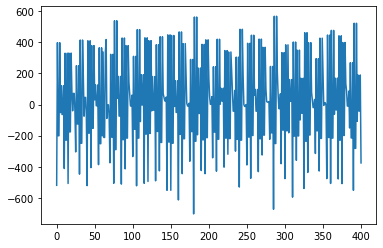

In [11]:
sample = data.loc[0, 'fft_0_a':'fft_400_a']

plt.plot(np.arange(len(sample)), sample)
plt.show()

In [12]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [18]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].replace(label_mapping)
X = data.drop('label', axis=1).copy()
y = data['label'].copy()

y.shape

(2132,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=np.random)
y_train.shape

(1705,)

In [27]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print(model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims_3 (TFOpLambd  (None, 2548, 1)          0         
 a)                                                              
                                                                 
 gru_3 (GRU)                 (None, 2548, 256)         198912    
                                                                 
 flatten_3 (Flatten)         (None, 652288)            0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________

In [28]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50
43/43 [==============================] - 63s 1s/step - loss: 26.9939 - accuracy: 0.8013 - val_loss: 8.6725 - val_accuracy: 0.8299
Epoch 2/50
43/43 [==============================] - 96s 2s/step - loss: 6.2709 - accuracy: 0.8981 - val_loss: 26.8823 - val_accuracy: 0.8123
Epoch 3/50
43/43 [==============================] - 70s 2s/step - loss: 5.3572 - accuracy: 0.9348 - val_loss: 4.1461 - val_accuracy: 0.9238
Epoch 4/50
43/43 [==============================] - 71s 2s/step - loss: 2.5872 - accuracy: 0.9472 - val_loss: 4.3067 - val_accuracy: 0.9443
Epoch 5/50
43/43 [==============================] - 69s 2s/step - loss: 1.3807 - accuracy: 0.9758 - val_loss: 3.7159 - val_accuracy: 0.9443
Epoch 6/50
43/43 [==============================] - 71s 2s/step - loss: 0.1727 - accuracy: 0.9941 - val_loss: 3.3872 - val_accuracy: 0.9472
Epoch 7/50
43/43 [==============================] - 69s 2s/step - loss: 0.4032 - accuracy: 0.9897 - val_loss: 2.2588 - val_accuracy: 0.9619
Epoch 8/50
43/43 [

In [30]:
model.evaluate(X_test, y_test, verbose=0)

[2.030848264694214, 0.9625293016433716]